In [ ]:
import numpy as np 
from tkinter import *
from PIL import Image
from PIL import ImageTk as itk
import time

res = 500   # Animation resolution
tk = Tk()  
tk.geometry( str(int(res*1.1)) + 'x'  +  str(int(res*1.3)) )
tk.configure(background='white')

canvas = Canvas(tk, bd=2)            # Generate animation window 
tk.attributes('-topmost', 0)
canvas.place(x=res/20, y=res/20, height= res, width= res)
ccolor = ['#0008FF', '#DB0000', '#12F200']

temperature = Scale(tk, from_=0.01, to=10, orient=HORIZONTAL, label='Temperature', font=("Helvetica", 8),resolution=0.01)
temperature.place(relx=.12, rely=.85, relheight= 0.12, relwidth= 0.33)     
temperature.set(1)            # Parameter slider for temperature                                                    

mag = Scale(tk, from_=-1, to=1, orient=HORIZONTAL, label='Magnetic field', font=("Helvetica", 8) ,resolution=0.01)
mag.place(relx=.57, rely=.85, relheight= 0.12, relwidth= 0.33)
mag.set(0)          # Parameter slider for external magnetic field


# Decide on the parameters
l = 200
J = 1       # Neighbor interaction [k_BT/unit spin] 

# Initialize the lattice
S = np.sign(np.random.rand(l,l) - 0.5)
ferromagnet_image = np.zeros((l,l,3))  
t = 0 
while True: 
    T = temperature.get()                       # Read adjusted temperature from the slider
    H = mag.get()                               # Read adjusted temperature from the slider
    i = np.random.randint(0,l,int(l*l/10))      # The rows of the elements that will be iterated
    j = np.random.randint(0,l,int(l*l/10))      # The columns of the elements that will be iterated
    E = (-J * ( S[i-1,j] + S[(i+1)%l,j] + S[i,j-1] + S[i,(j+1)%l] ) - H)/T     # The energy of a plus spin
    S[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2   # Monte Carlo algorithm 

    ferromagnet_image[:,:,:] = 0                                                   
    ferromagnet_image[:,:,0] =   (S == -1)*255               
    ferromagnet_image[:,:,1] =   (S == -1)*255                  
    ferromagnet_image[:,:,2] =   (S == 1)*255 
    t += 1
    
    img = itk.PhotoImage(Image.fromarray(np.uint8(ferromagnet_image),'RGB').resize((res,res)))
    canvas.create_image(0,0, anchor=NW, image=img) 
    tk.title('time'+ str(t) + '   Magnetization:' + str(np.mean(S)))
    tk.update()

Tk.mainloop(canvas)    

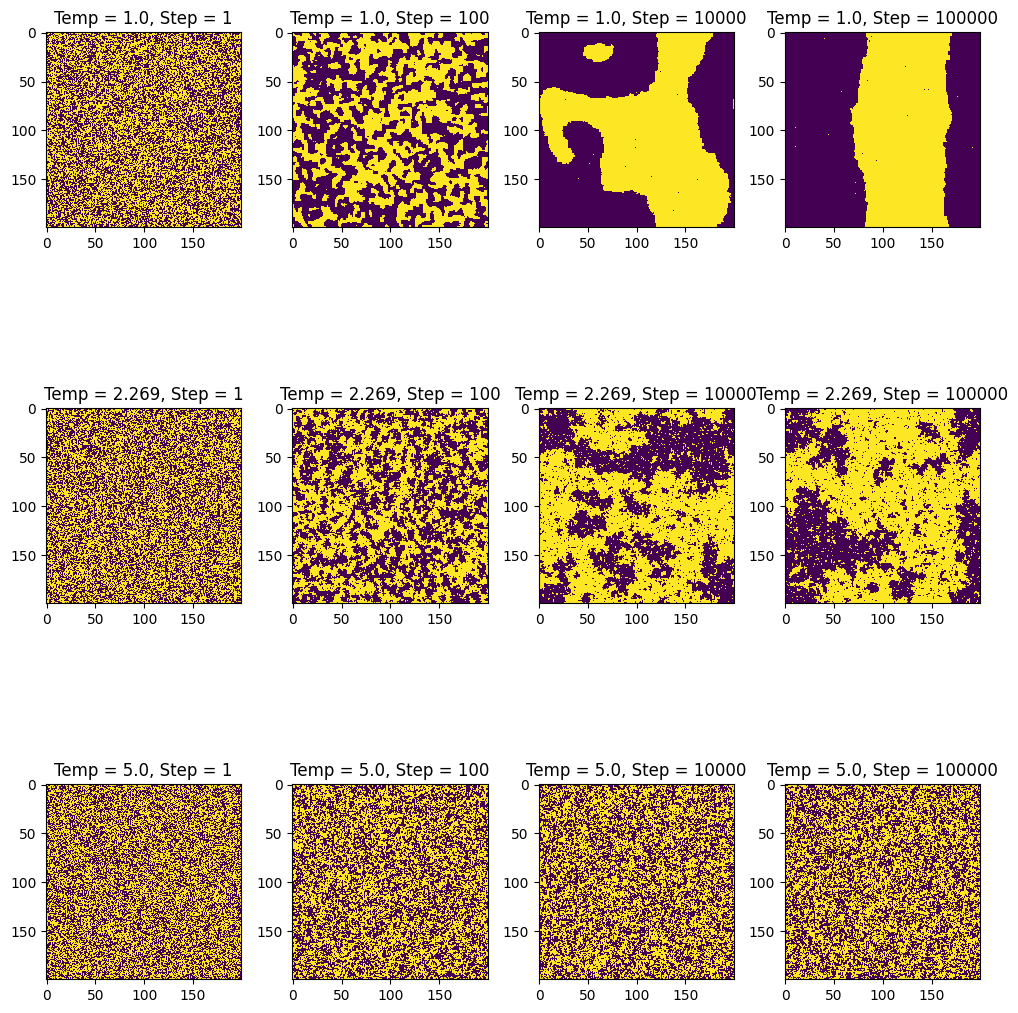

In [71]:
#Excercise 2.2
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# Define lattice size
l = 200  # Size of the lattice (200x200 in this case)
J = 1   #Neighbor interaction [k_BT/unit spin]
H = 0   #the external magnetic field

# Define the number of Monte Carlo steps
num_steps_list = [1,100,10000, 100000] # Adjust the number of steps as needed
max_steps = max(num_steps_list)

#List of the temperature
temperatures = [1.00 ,2.269,5.00]

snapshots = []

# Monte Carlo simulation
for T in temperatures:
    # Initialize the lattice with random spins (+1 or -1)
    lattice = np.random.choice([1, -1], size=(l, l))
    for step in range(max_steps+1):
                     
        i = np.random.randint(0,l,int(l*l/10))      # The rows of the elements that will be iterated
        j = np.random.randint(0,l,int(l*l/10))      # The columns of the elements that will be iterated
        E = (-J * ( lattice[i-1,j] + lattice[(i+1)%l,j] + lattice[i,j-1] + lattice[i,(j+1)%l] ) - H)/T     # The energy of a plus spin
        lattice[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2   # Monte Carlo algorithm
        
        if step in num_steps_list:
            snapshots.append((T, step, lattice.copy()))

temperature_len = len(temperatures)
num_steps_len = len(num_steps_list)
subplot_idx = 1
# Plot the binary spin map
plt.figure(figsize=(10, 12))
for T, num_steps,lattice in snapshots :
    plt.subplot(temperature_len, num_steps_len, subplot_idx)
    plt.imshow(lattice, interpolation='nearest') 
    plt.title(f"Temp = {T}, Step = {num_steps}")
    subplot_idx += 1

plt.tight_layout()
plt.show()

In [7]:
#exercise 2.2 c
import numpy as np

l = 200         #Size of model
T = 5.0         #Temperature
N = l*l         #No. of atoms
H = 0           #External magnetic fields
J = 1           #Neighbor interaction [k_BT/unit spin]
steps = 10**5   

# Initialize the lattice with random spins (+1 or -1)
lattice = np.random.choice([1, -1], size=(l, l))

#Update lattice with number of steps
for step in range(steps):
        i = np.random.randint(0,l,int(l*l/10))      # The rows of the elements that will be iterated
        j = np.random.randint(0,l,int(l*l/10))      # The columns of the elements that will be iterated
        E = (-J * ( lattice[i-1,j] + lattice[(i+1)%l,j] + lattice[i,j-1] + lattice[i,(j+1)%l] ) - H)/T     # The energy of a plus spin
        lattice[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2

#Calculate the magnitization
m = np.sum(lattice)/(N**2)      #eq 2.3
print("The magnitization of this system at T = 5.0 is  ",m)

The magnitization of this system at T = 5.0 is   -3e-08


Text(0.5, 1.0, 'The total magnetization of this system as a function of H')

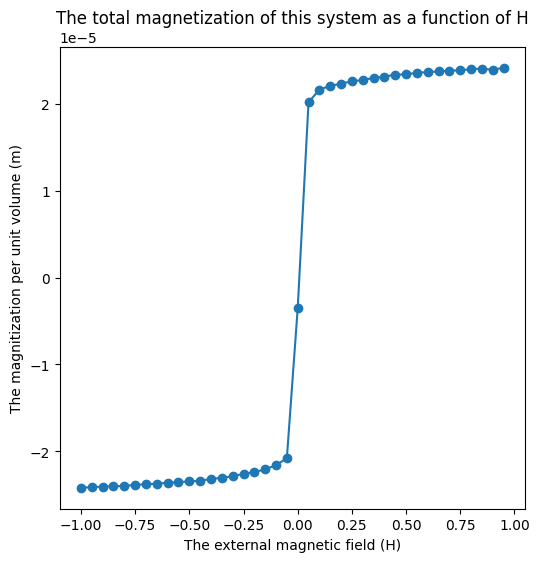

In [9]:
#exercise 2.2 d
import numpy as np
import matplotlib.pyplot as plt

l = 200     #Size of model
T = 2.269      #Temperature
N = l*l     #No. of atoms
J = 1       #Neighbor interaction [k_BT/unit spin]
steps = 10**4

H_range = np.arange(-1,1,0.05)      #list of H

m_list = []     #List to store m of each

for H in H_range:
    lattice = np.random.choice([1, -1], size=(l, l))
    for _ in range(steps):
        i = np.random.randint(0,l,int(l*l/10))      # The rows of the elements that will be iterated
        j = np.random.randint(0,l,int(l*l/10))      # The columns of the elements that will be iterated
        E = (-J * ( lattice[i-1,j] + lattice[(i+1)%l,j] + lattice[i,j-1] + lattice[i,(j+1)%l] ) - H)/T     # The energy of a plus spin
        lattice[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2
    m = np.sum(lattice)/(N**2)
    m_list.append(m)

plt.figure(figsize=(6,6))
plt.plot( H_range, m_list,'o-') 
plt.xlabel("The external magnetic field (H)")
plt.ylabel("The magnitization per unit volume (m)")
plt.title(f"The total magnetization of this system as a function of H")

In [10]:
#Calculate the magnetic susceptibility
#Combue 2 lists into 2-d array
data_array = np.column_stack((H_range,m_list ))
point_1 = data_array[19,:]
point_2 = data_array[21,:]

X = (point_2[1] - point_1[1])/(point_2[0] - point_1[0])

print("The magnetic susceptibility (X) is ",X)

The magnetic susceptibility (X) is  0.00041001249999999965
